In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

import data_extraction as da
import modelling as md
import plotting

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/eye4got/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
trans_df = pd.read_parquet(da.all_transcripts_df_dir)
subs_df = pd.read_parquet(da.sub_df_dir)

subs_df['movie'] = subs_df['movie'].str.title()
trans_df['movie_name'] = trans_df['movie_name'].str.title()

filtered_subs_df = subs_df[subs_df.movie.isin(trans_df['movie_name'].unique())]

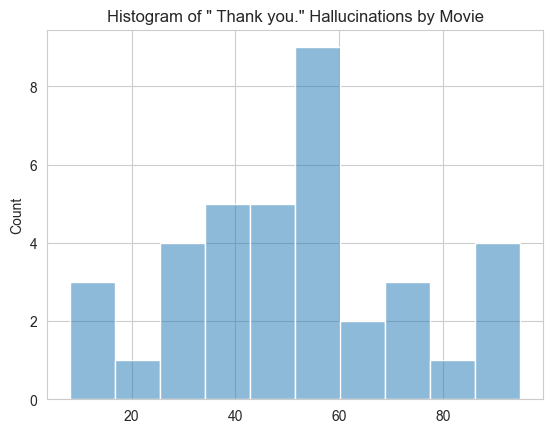

In [3]:
plotting.create_thank_you_hist(trans_df)
# TODO: consider evaluating per segment count or per character count

In [4]:
red_trans_df = trans_df[trans_df.text.ne(' Thank you.')]

Text(0.5, 1.0, 'Histogram of Proportion of Text from Narrator by Movie')

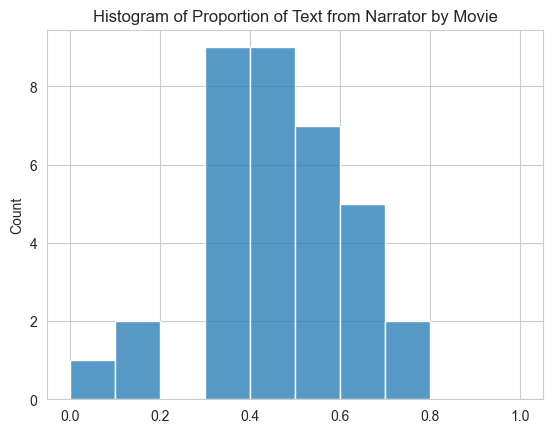

In [5]:
trans_wc_df = red_trans_df.groupby('movie_name').text.apply(' '.join).apply(md.process_text, excl_stopwords=True).apply(len)
subs_wc_df = filtered_subs_df.groupby('movie').raw_dialogue.apply(' '.join).apply(md.process_text, excl_stopwords=True).apply(len)

perc_narration_df = trans_wc_df / (subs_wc_df + trans_wc_df)

sns.histplot(perc_narration_df, binrange=(0, 1), bins=10)
plt.title('Histogram of Proportion of Text from Narrator by Movie')

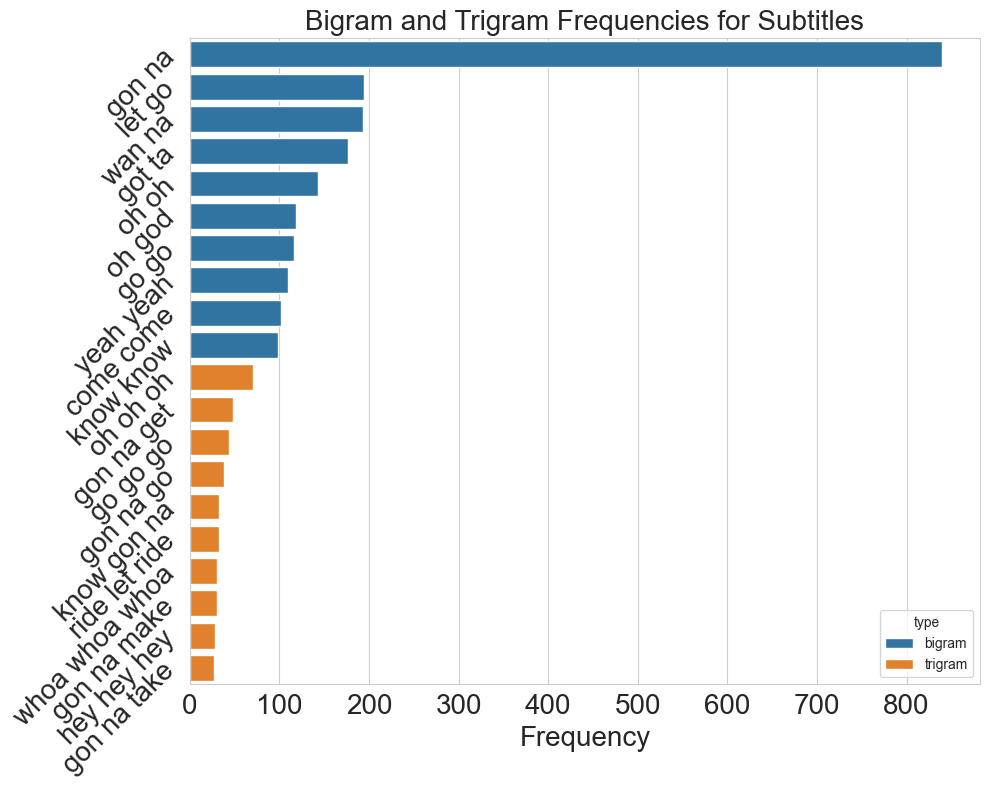

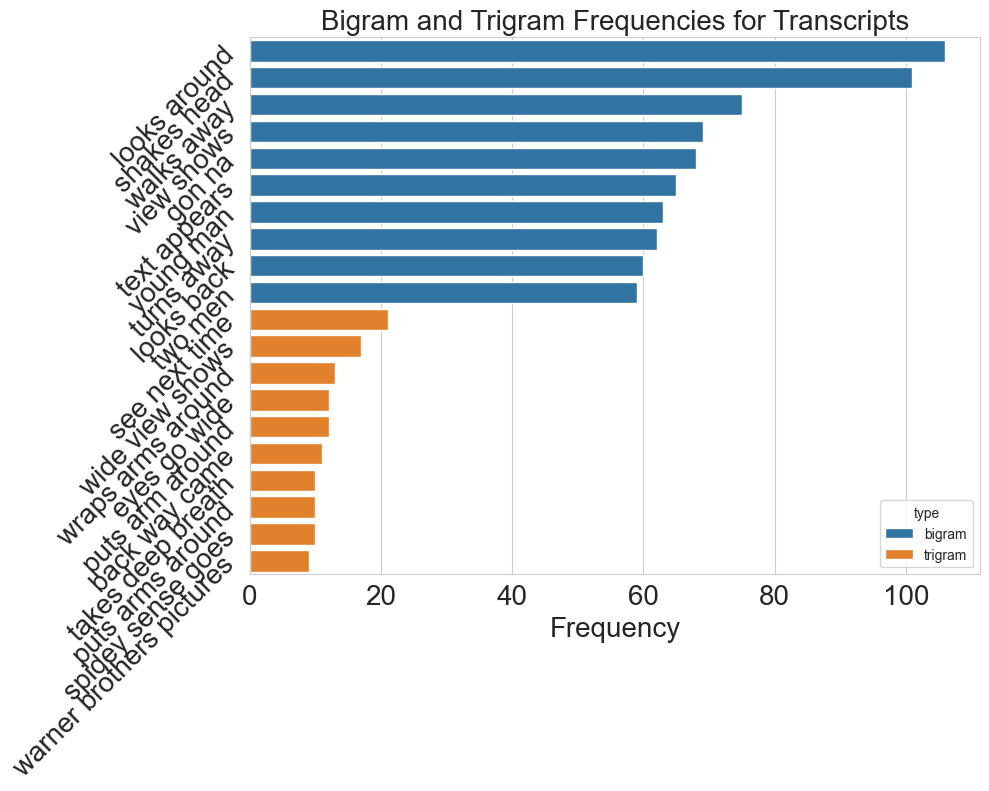

In [6]:
subs_text = ' '.join(filtered_subs_df.raw_dialogue)
trans_text = ' '.join(red_trans_df.text)
dataset = {'Subtitles': subs_text, 'Transcripts': trans_text}

excl_stopwords = True

for title, text in dataset.items():
    bigram_df = md.get_ngram_counts(text, 2, excl_stopwords=excl_stopwords)
    trigram_df = md.get_ngram_counts(text, 3, excl_stopwords=excl_stopwords)

    bigram_df['type'] = 'bigram'
    trigram_df['type'] = 'trigram'

    full_df = pd.concat([bigram_df, trigram_df])
    title = f"Bigram and Trigram Frequencies for {title}"
    plotting.plot_ngrams(full_df, title, os.path.join(plotting.output_dir, f'{title} ngram ranking.png'))